In [78]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import csv
import warnings


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [79]:
#plot settings
pd.set_option('display.mpl_style', 'default') 
plt.rcParams['figure.figsize'] = (15, 5) # ratio 3:2 plot size

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [80]:
labels = ['title', 'date', 'specific_incident', 'ongoing_series', 
          'dominant_topic_mult', 'rationalized_topics', 'article_text', 
          'larger_context', 'number_vehicles', 'exclude', 'agencies_mult', 
          'statistics', 'like_count', 'duration', 'favorite_count', 
          'view_count', 'dislike_count', 'comment_count', 'byline', 
          'author', 'accident_count_process', 'transport_type', 
          'time_of_day', 'news_source', 'relevance_ranking', 
          'location', 'article_key', 'scope_statistics', 'rater', 
          'cause', 'rationalized_causes', 'orgs_cited', 
          'road_crash_liable', 'link', 'kicker', 'news_type', 
          'solutions_mult', 'tone', 'language', 'location2', 
          'report_type', 'youtube_id', 'vehicle_type', 'rater_notes']

##Importing text articles:

In [81]:
# read in labeled results
text_articles = pd.read_csv('articles_raw.csv', header=0)
print text_articles.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 2336
Data columns (total 38 columns):
title                   2337 non-null object
date                    2337 non-null object
specific_incident       774 non-null object
ongoing_coverage        176 non-null object
dominant_topics         774 non-null object
rationalized_topics     774 non-null object
article                 2255 non-null object
larger_context          295 non-null object
how_many_vehicles       263 non-null float64
agencies                159 non-null object
statistics              454 non-null object
byline                  1504 non-null object
author                  1503 non-null object
accident_count          398 non-null object
transport_categories    268 non-null object
time_od_day             181 non-null object
source                  2337 non-null object
relevance_ranking       2310 non-null float64
location                271 non-null object
pk                      2337 non-null int64
stat

##Importing Victim info:

In [82]:
victims = pd.read_csv('injured_killed_raw.csv', header=0)
text_articles_with_victims = pd.merge(text_articles,victims,on="pk", how="outer")
print text_articles_with_victims.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 2337
Data columns (total 44 columns):
title                   2337 non-null object
date                    2337 non-null object
specific_incident       774 non-null object
ongoing_coverage        176 non-null object
dominant_topics         774 non-null object
rationalized_topics     774 non-null object
article                 2255 non-null object
larger_context          295 non-null object
how_many_vehicles       263 non-null float64
agencies                159 non-null object
statistics              454 non-null object
byline                  1504 non-null object
author                  1503 non-null object
accident_count          398 non-null object
transport_categories    268 non-null object
time_od_day             181 non-null object
source                  2337 non-null object
relevance_ranking       2310 non-null float64
location                271 non-null object
pk                      2338 non-null float64
st

##Importing video data:

In [83]:
videos = pd.read_csv('videos_raw.csv', header=0)
videos.rename(columns={'rationalized_topics': 'dominant_topics'}, inplace=True)
videos['survey'].fillna('yes',inplace=True)

print videos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 34 columns):
source                  179 non-null object
show                    179 non-null object
reporter                168 non-null object
report_type             179 non-null object
date                    179 non-null object
link                    179 non-null object
specific_incident       148 non-null object
dominant_topics         179 non-null object
ongoing_coverage        114 non-null object
title                   179 non-null object
how_many_vehicles       65 non-null float64
transport_categories    58 non-null object
vehicle_type            63 non-null object
injured_number          34 non-null float64
injured_specific        27 non-null object
killed_number           22 non-null float64
killed_specific         16 non-null object
location                60 non-null object
time_od_day             26 non-null object
potential_causes        40 non-null object
road_crash_liable     

##Combining articles + videos + victims into one Dataframe:

In [84]:
reports_complete = [text_articles_with_victims,videos]
reports = pd.concat(reports_complete)
print reports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 178
Data columns (total 49 columns):
Legal action            5 non-null object
accident_count          398 non-null object
agencies                159 non-null object
article                 2255 non-null object
author                  1503 non-null object
byline                  1504 non-null object
cited_orgs              542 non-null object
completed               774 non-null object
date                    2516 non-null object
dominant_topics         953 non-null object
footage                 13 non-null object
how_many_vehicles       328 non-null float64
injured_number          223 non-null float64
injured_specific        203 non-null object
kicker                  47 non-null object
killed_number           164 non-null float64
killed_specific         141 non-null object
language                2516 non-null object
larger_context          313 non-null object
link                    2516 non-null object
location 

In [85]:
reports[reports.relevance_ranking >= 2].count()

Legal action               5
accident_count           394
agencies                 159
article                 1950
author                  1294
byline                  1289
cited_orgs               491
completed                774
date                    1973
dominant_topics          774
footage                    0
how_many_vehicles        263
injured_number           189
injured_specific         176
kicker                    45
killed_number            142
killed_specific          124
language                1973
larger_context           295
link                    1973
location                 271
location.1              1666
news_type               1973
ongoing_coverage         176
order_id                1973
other                      9
pk                      1973
potential_causes         201
rater                    774
rater_notes              150
rationalized_causes      200
rationalized_topics      774
relevance_ranking       1973
report_type              774
reporter      

In [86]:
reports.date[:10]


0    1/2/2014
1    1/2/2014
2    1/2/2014
3    1/2/2014
4    1/2/2014
5    1/2/2014
6    1/2/2014
7    1/3/2014
8    1/3/2014
9    1/3/2014
Name: date, dtype: object

In [87]:
# convert date column to datetime type
reports['date'] = pd.to_datetime(reports['date'])


In [88]:
# setting date as index
reports = reports.set_index(pd.DatetimeIndex(reports['date']))
type(reports.index)


pandas.tseries.index.DatetimeIndex

In [89]:
reports.survey = reports.survey.str.lower()
reports.completed = reports.completed.str.lower()
reports.specific_incident = reports.specific_incident.str.lower()
reports.statistics = reports.statistics.str.lower()
reports.statistics_scope = reports.statistics_scope.str.lower()
reports.solutions_discussed = reports.solutions_discussed.str.lower()
reports.larger_context = reports.larger_context.str.lower()
reports.dominant_topics = reports.dominant_topics.str.lower()
reports['completed'].fillna(reports['survey'], inplace=True)
reports = reports[reports.completed == 'yes']
reports.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 953 entries, 2014-01-02 00:00:00 to 2014-12-24 00:00:00
Data columns (total 49 columns):
Legal action            5 non-null object
accident_count          207 non-null object
agencies                159 non-null object
article                 774 non-null object
author                  529 non-null object
byline                  558 non-null object
cited_orgs              542 non-null object
completed               953 non-null object
date                    953 non-null datetime64[ns]
dominant_topics         953 non-null object
footage                 13 non-null object
how_many_vehicles       328 non-null float64
injured_number          223 non-null float64
injured_specific        203 non-null object
kicker                  21 non-null object
killed_number           164 non-null float64
killed_specific         140 non-null object
language                953 non-null object
larger_context          313 non-null object
link           

In [90]:
##saving reports as CSV 
reports.to_csv("reports_full.csv",index_label="date")

## How many reports on land transportation were published in 2014?

source
abs-cbnnews    246
gmanetwork     395
inquirer       312
dtype: int64


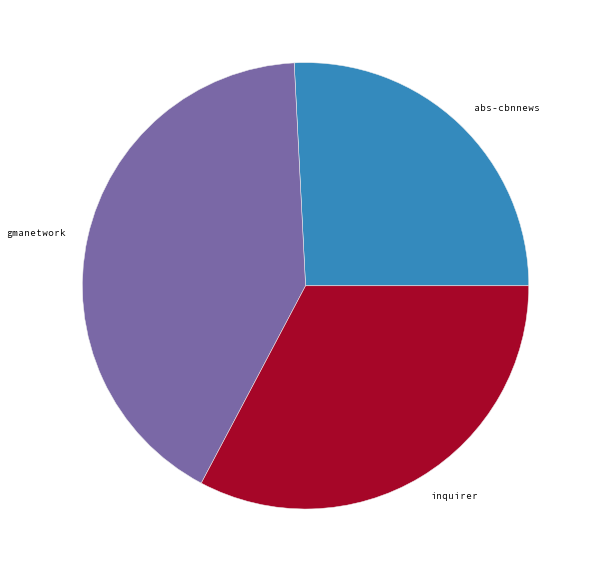

In [91]:
# grouped by reporting source

reports.groupby('source').size().plot(kind='pie', figsize=(10,10))
print reports.groupby('source').size()


### The following code attempts to plot article frequency over time (1 month, 1 week, 1 day) but we're getting errors! Not sure why. Commented out for now.

Peaks on Wednesdays! (curiously, most internet traffic peaks on wednesdays)

##Breakdown by media type:
Some quick figures to give an overview of the dataset.

text     774
video    179
dtype: int64


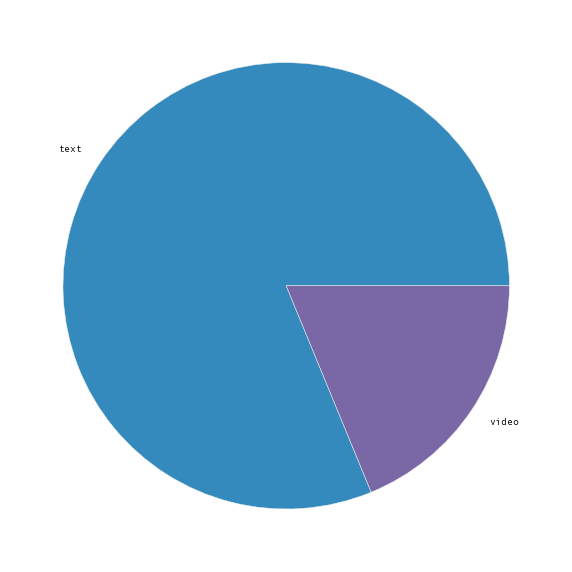

In [92]:
media_types = pd.Series(reports.news_type)
print media_types.value_counts()
media_types.value_counts().plot(kind='pie',figsize=(10,10))


Total Text articles:

In [93]:
len(reports[reports.news_type == 'text'])


774

Total Videos

In [94]:
len(reports[reports.news_type == 'video'])


179

Qualitative Review Sample Size: How many videos + articles we actually read/watched!

In [95]:
print len(reports[reports.completed == 'yes'])


953


In [96]:
print len(reports[reports.specific_incident == 'yes'])

497


## Deep dive into topics

In [97]:
# break out into an array of individual values

def clean_list(topics):
    clean_list = []
    for topic in topics:
        clean_list.extend(topic.split(','))
    return clean_list

In [98]:
alltopics = clean_list(reports.dominant_topics.dropna())
topics_raw = pd.Series([x.strip() for x in alltopics])
print topics_raw.value_counts()

road crashes                                  325
enforcement of existing lawsordinances        180
road crash incident(s)                        150
reports on traffic congestion                 125
traffic advisories                             69
road rage                                      55
truck ban                                      52
road infrastructure repair                     46
maintenance                                    46
colorum fines                                  42
mrt                                            30
public transportation infrastructure           26
formulation of legislationlocal ordinances     25
traffic congestion advisory                    25
traffic management schemes                     25
...
enforcement of existing laws and ordinance                      1
cctv cameras                                                    1
funeral of road crash victim                                    1
rationalization of provincial bus routes        

In [99]:
def clean_topics(models):
    clean_list = []
    for model in models:
        if "crash" in model:
            clean_list.append("road crashes")
        elif "congestion"in model:
            clean_list.append("traffic congestion")
        elif "colorum" in model:
            clean_list.append("colorum")
        elif "ltfrb" in model:
            clean_list.append("public transportation regulation")
        elif "franchise" in model:
            clean_list.append("public transportation regulation")
        elif "speed limit" in model:
            clean_list.append("traffic management")
        elif "traffic management" in model:
            clean_list.append("traffic management")
        elif "enforcement of existing" in model:
            clean_list.append("transport-related policy")
        elif "bik" in model:
            clean_list.append("nonmotorized transport")
        elif "cycl" in model:
            clean_list.append("nonmotorized transport")
        elif "pedestrian" in model:
            clean_list.append("nonmotorized transport")
        elif "new modes" in model:
            clean_list.append('alternative transportation')
        elif "alternative transport" in model:
            clean_list.append("alternative transportation")
        elif "traffic enforcement" in model:
            clean_list.append('traffic enforcement and violations')
        elif "truck" and "policy" in model:
            clean_list.append('traffic management')
        elif "road safety" in model:
            clean_list.append("road safety")
        elif "public transport facilities" in model:
            clean_list.append("public transportation infrastructure")
        elif "public transport regulation" in model:
            clean_list.append('public transportation regulation')
        elif "puv fines" in model:
            clean_list.append('colorum')
        elif "legislation" in model:
            clean_list.append("transport-related policy")
        elif "license plate" in model:
            clean_list.append("license plate regulation")
        elif "mrt" in model:
            clean_list.append("public transportation infrastructure")
#        elif "regulat" and "trans" in model:
#            clean_list.append('public transportation regulation')
        elif "taxi regulation" in model:
            clean_list.append('public transportation regulation')
        elif "uber" in model:
            clean_list.append('public transportation regulation')
        elif "commuter" in model:
            clean_list.append("commuter welfare")
        elif "road rage" in model:
            clean_list.append("road rage")
        elif "truck ban" in model:
            clean_list.append("truck ban")
        elif "victims" in model:
            clean_list.append("road crash victims")
        elif "road infrastructure" in model:
            clean_list.append("road infrastructure")
        elif "jaywalking" == model:
            clean_list.append("traffic enforcement and violations")
        elif "traffic scheme" in model:
            clean_list.append("traffic management")
        elif "education" in model:
            clean_list.append("road user education")
        elif "fare" in model:
            clean_list.append('jeepney fare')
        elif "road sign" in model:
            clean_list.append("traffic management")
        elif "bus system" in model:
            clean_list.append("traffic management")
        elif "bus route" in model:
            clean_list.append("traffic management")
        elif "road rage" in model:
            clean_list.append('road rage')
        elif "maintenance" == model:
            None
        else:
            clean_list.append(model)
    return clean_list

rationalized_topics = pd.Series(clean_topics(topics_raw))
rationalized_topics.value_counts()[:10]

road crashes                            527
transport-related policy                216
traffic congestion                      183
colorum                                  73
traffic advisories                       69
public transportation infrastructure     60
road rage                                56
truck ban                                53
road infrastructure                      48
public transportation regulation         46
dtype: int64

### Top 20 dominant news topics

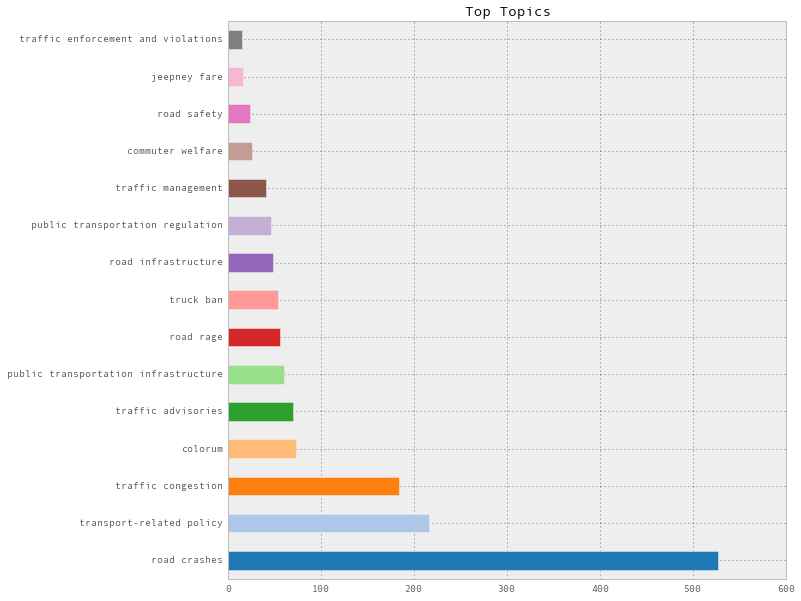

In [100]:
top10_topics = rationalized_topics.value_counts()[:15]
top10_topics.plot(kind='barh', figsize=(10,10), color=tableau20, title = "Top Topics")


#Ongoing Series Coverage

In [101]:
def split_on_space(hashtags):
    per_incident = []
    for hashtag in hashtags: 
        per_incident.extend(hashtag.split(' '))
    return per_incident


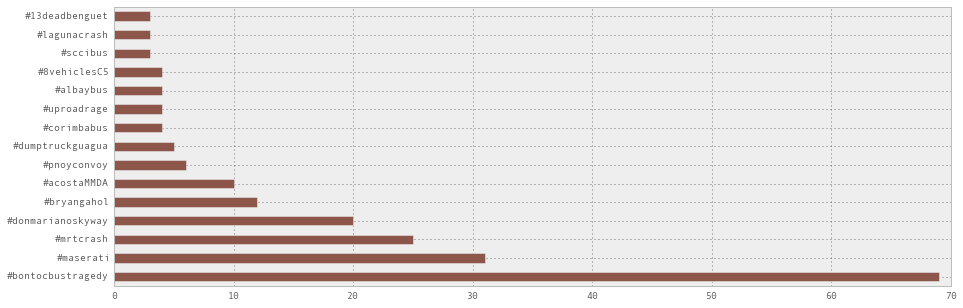

In [102]:
ongoing_coverage = pd.Series(split_on_space(reports.ongoing_coverage.dropna()))
ongoing_coverage.value_counts()[:15].plot(kind='barh', color=tableau20[10])


ongoing_coverage shows the number of articles written about a specific topic

In [103]:
ongoing_coverage.unique()


array(['#SRPtunnelcrash', '#donmarianoskyway', '#hitandrunQC',
       '#bontocbustragedy', '#abracrash', '#cebuPWDcrash',
       '#8vehiclecollissionQC', '#SUVskywaycrash',
       '#mayamybuscommonwealth', '#elenalinerbuscrash', '#4deadcavite',
       '#matalamcrash', '#40hurtonSLEX', '#southerncarrier',
       '#truckbuscollisionEDSA', '#bryangahol', '#corimbabus',
       '#pnoyconvoy', '#uproadrage', '#2deadonC5', '#trainjeepcrashManila',
       '#maserati', '#1killedTaytay', '#3deadincagayan', '#pnrtondocrash',
       '#20vehiclemarcoshighway', '#8vehiclesC5', '#TVexeccrash',
       '#16hurtQuezon', '#3buscollisionEDSA', '#16hurtinSablan',
       '#buguiascrash', '#lagunacop', '#victorylinerNLEX', '#apalitcrash',
       '#truckfallsTaguig', '#47hurtBatangas', '#xavierschoolbus',
       '#asistiocrash', '#acostaMMDA', '#1deadsorsogon', '#truckSLEX',
       '#7hurtinparanaque', '#cavitecouple', '#skywaycoaster', '#sccibus',
       '#2killedinbenguet', '#9deadincarcar', '#libmanan',
  

# Examining Causes

c = clean_list(articles.rationalized_causes.dropna())
causes = pd.Series([x.strip() for x in c])
causes.value_counts().plot(kind='barh', title="Causes of Road Incidents")


In [104]:
c = clean_list(reports.potential_causes.dropna())
causes_raw = pd.Series([x.strip() for x in c])
print causes_raw.value_counts()
print causes_raw.str.contains('helmet').sum()
print causes_raw.str.contains('seatbelt').sum()

loss of brakes                     47
speeding                           46
alcohol                            33
fatigue                            18
overtaking                         15
loss of vehicle control            12
disregard for road rules            9
dilapidated vehicle                 8
bad weather                         6
poor visibilitylack of lighting     6
loss of control                     6
road obstruction                    6
slippery road                       5
reckless driving                    4
disregard for traffic rules         4
...
altercation with another motorcycle driver      1
driver did not see victims                      1
loss of control due to sharp curve              1
sharp curve                                     1
lack of lights                                  1
engine problems                                 1
failure to set up early warning device          1
loss of vehicle control due to slippery road    1
loss of vehicle control du

In [105]:
def clean_causes(models):
    clean_list = []
    for model in models:
        if "control" in model:
            clean_list.append("loss of control")
        elif "tire" in model:
            clean_list.append("tires or wheels")
        elif "wheels" in model:
            clean_list.append("tires or wheels")
        elif "brake" in model:
            clean_list.append("brakes")
        elif "slippery" in model:
            clean_list.append("wet road")
        elif "muddy" in model:
            clean_list.append("wet road")
        elif "wet" in model:
            clean_list.append("wet road")
        elif "driver" in model:
            clean_list.append("driver error")
        elif "visibility" in model:
            clean_list.append("poor visibility")
        elif "lighting" in model:
            clean_list.append("poor visibility")
        elif "reckless" in model:
            clean_list.append("reckless driving")
        elif "road rules" in model:
            clean_list.append("reckless driving")
        elif "not following" in model:
            clean_list.append("reckless driving")
        elif "disregard" in model:
            clean_list.append("reckless driving")
        elif "miscalculation" in model:
            clean_list.append("reckless driving")
        elif "engine" in model:
            clean_list.append("engine trouble")
        elif "sharp" in model:
            clean_list.append("sharp turn")
        elif "overtaking" in model:
            clean_list.append("reckless driving")
        elif "counterflow" in model:
            clean_list.append("reckless driving")
        elif "pedestrian" in model:
            clean_list.append("pedestrian error")
        elif "sidesw" in model:
            clean_list.append("sideswiping")
        elif "swerving" in model:
            clean_list.append("sideswiping")
        elif "mechanical" in model:
            clean_list.append("vehicle-related")
        elif "dilapidated" in model:
            clean_list.append("vehicle-related")
        elif "malfunction" in model:
            clean_list.append("vehicle-related")
        elif "improvised" in model:
            clean_list.append("vehicle-related")
        elif "parked" in model:
            clean_list.append("road obstruction")
        else:
            clean_list.append(model)
    return clean_list

brakes                                     48
speeding                                   46
reckless driving                           40
alcohol                                    33
loss of control                            30
fatigue                                    18
vehicle-related                            16
tires or wheels                            15
wet road                                   10
driver error                                9
poor visibility                             7
road obstruction                            7
bad weather                                 6
engine trouble                              4
sideswiping                                 4
beating the red light                       2
Mobile Phone use while driving              2
overloading                                 2
sharp turn                                  2
drugs                                       2
pedestrian error                            2
poor road conditions              

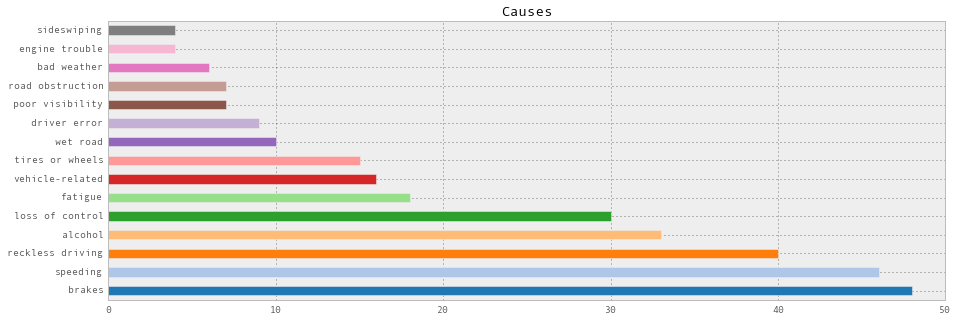

In [106]:
#causes = clean_list(reports.potential_causes.dropna())
#causes = [x.strip().lower() for x in c]
causes_clean = pd.Series(clean_causes(causes_raw))
print causes_clean.value_counts()
causes_clean.value_counts()[:15].plot(kind='barh', color=tableau20, title="Causes")

In [107]:
def broad_causes_group(models):
    clean_list = []
    for model in models:
        if "control" in model:
            clean_list.append("driver-related")
        elif "tire" in model:
            clean_list.append("vehicle-related")
        elif "wheels" in model:
            clean_list.append("vehicle-related")
        elif "brake" in model:
            clean_list.append("vehicle-related")
        elif "slippery" in model:
            clean_list.append("road-related")
        elif "muddy" in model:
            clean_list.append("road-related")
        elif "wet" in model:
            clean_list.append("road-related")
        elif "driver" in model:
            clean_list.append("driver-related")
        elif "shaft" in model:
            clean_list.append("vehicle-related")
        elif "visibility" in model:
            clean_list.append("road-related")
        elif "lighting" in model:
            clean_list.append("road-related")
        elif "driving" in model:
            clean_list.append("driver-related")
        elif "road rules" in model:
            clean_list.append("driver-related")
        elif "not following" in model:
            clean_list.append("driver-related")
        elif "disregard" in model:
            clean_list.append("driver-related")
        elif "miscalculation" in model:
            clean_list.append("driver-related")
        elif "engine" in model:
            clean_list.append("vehicle-related")
        elif "sharp" in model:
            clean_list.append("road-related")
        elif "overtaking" in model:
            clean_list.append("driver-related")
        elif "counterflow" in model:
            clean_list.append("driver-related")
        elif "sidesw" in model:
            clean_list.append("driver-related")
        elif "swerving" in model:
            clean_list.append("driver-related")
        elif "mechanical" in model:
            clean_list.append("vehicle-related")
        elif "dilapidated" in model:
            clean_list.append("vehicle-related")
        elif "malfunction" in model:
            clean_list.append("vehicle-related")
        elif "improvised" in model:
            clean_list.append("vehicle-related")
        elif "parked" in model:
            clean_list.append("road-related")
        elif "obstruction" in model:
            clean_list.append("road-related")
        elif "alcohol" in model: 
            clean_list.append("driver-related")
        elif "speeding" in model:
            clean_list.append("driver-related")
        elif "fatigue" in model:
            clean_list.append("driver-related")
        elif "road conditions" in model:
            clean_list.append("road-related")
        elif "drugs" in model:
            clean_list.append("driver-related")
        elif "beating" in model:
            clean_list.append("driver-related")
        elif "stoplights" in model:
            clean_list.append("road related")
        elif "sudden stop" in model:
            clean_list.append("driver-related")
        elif "guard rails" in model:
            clean_list.append("road related")
        elif 'gadgets' in model:
            clean_list.append("vehicle-related")
        else:
            clean_list.append(model)
    return clean_list

325
driver-related                            187
vehicle-related                            85
road-related                               28
bad weather                                 6
pedestrian error                            2
overloading                                 2
lack of lights                              1
failure to set up early warning device      1
heavy load                                  1
resisting arrest                            1
road related                                1
passengers sitting on roof                  1
evading apprehension                        1
loose helmet strap                          1
new traffic flow                            1
lack of stoplight                           1
no license plate                            1
poor regulation of public transport         1
lack of traffic enforcer                    1
volume of vehicles                          1
lack of proper road signs                   1
dtype: int64


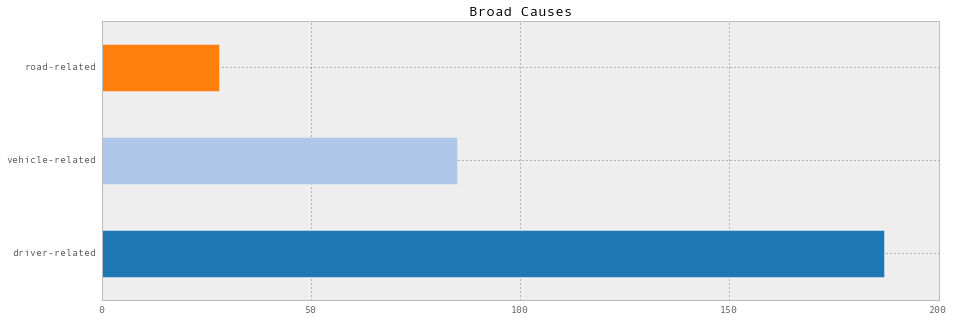

In [108]:
broad_causes = pd.Series(broad_causes_group(causes_clean))
print broad_causes.count()
print broad_causes.value_counts()
broad_causes.value_counts()[:3].plot(kind='barh', color=tableau20, title="Broad Causes")

#How many reports frame issue in broader context?

##Summary: Out of 954 reports we read/watched...
### ... 131 talked about solutions
### ... 54 related specific crashes to a pattern or trend
### ... 33 used statistics

In [109]:
len(reports[reports.larger_context == "yes"])

#Only 54 out of 924 reports we read related road crashes to a broader context.

54

In [110]:
len(reports[reports.statistics == "yes"])

#Only 33 reports used statistics!

33

In [111]:
len(reports[reports.solutions_discussed.notnull()])

#Number of reports that talked about solutions to road safety issues

131

In [112]:
statscope = clean_list(reports.statistics_scope.dropna())
stats_raw = pd.Series([x.strip() for x in statscope])
stats_raw.value_counts()[:15]

regional                                                        12
city or municipality wide                                        7
national                                                         5
not mentioned                                                    2
daily                                                            2
local                                                            2
seasonal                                                         1
commonwealth)                                                    1
specific road (nlex)                                             1
ncr                                                              1
specific to maharlika highway                                    1
location specific  commonwealth avenue                           1
city-wide                                                        1
specific road (edsa                                              1
streetspecific this is the fourth time a vehicle has fallen fr

In [113]:
def clean_stat_types(models):
    clean_list = []
    for model in models:
        if "specific" in model:
            clean_list.append("location specific")
        elif "local" in model:
            clean_list.append("location specific")
        elif "city" in model:
            clean_list.append("city or municipality-wide")
        elif "ncr" == model:
            clean_list.append("regional")
        elif "commonwealth" in model:
            clean_list.append("location specific")
        else:
            clean_list.append(model)
    return clean_list

regional                     13
location specific             9
city or municipality-wide     8
national                      5
not mentioned                 2
daily                         2
international                 1
seasonal                      1
dtype: int64


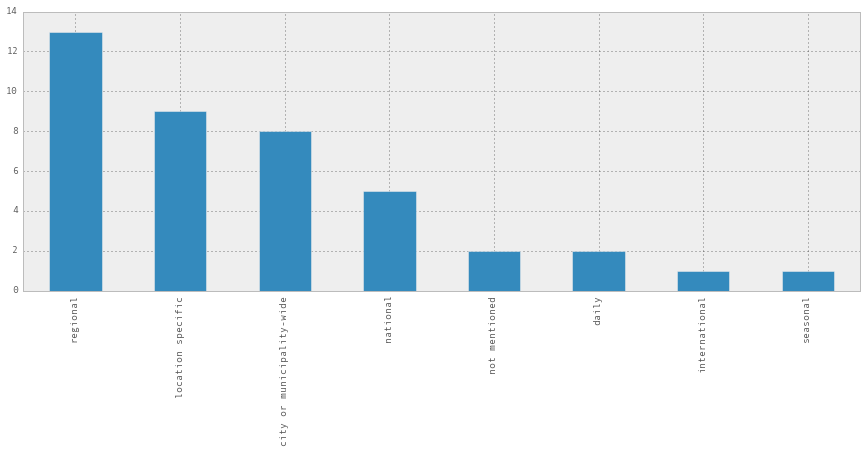

In [114]:
clean_stats= pd.Series(clean_stat_types(stats_raw))
print clean_stats.value_counts()[:15]
clean_stats.value_counts()[:15].plot(kind='bar')

In [115]:
s = clean_list(reports.solutions_discussed.dropna())
solutions_raw = pd.Series([x.strip() for x in s])
print solutions_raw.value_counts()[:10]

stricter public transport franchise regulation              37
improvement of traffic enforcement                          34
road user education                                         20
improvement of road infrastructure                          19
implementation of safety inspections on public transport    16
improved vehicle maintenance                                14
improvement of mass public transport infrastructure         13
enforcment of speed limits                                  11
improvement of infrastructure for pedestrians                6
use of seat belts                                            5
dtype: int64


solutions_raw.value_counts()[25:]

In [116]:
def clean_solutions(models):
    clean_list = []
    for model in models:
        if "speed" in model:
            clean_list.append("enforcement of speed limits")
        elif "defensive" in model:
            clean_list.append("defensive driving")
        elif "cyclist" in model:
            clean_list.append("improvement of infrastructure for cyclists")
        elif "education" in model:
            clean_list.append("road user education")
        elif "cctv" in model:
            clean_list.append("cctv cameras")
        elif "traffic aides" in model:
            clean_list.append("improvement of traffic enforcement")
        elif "vehicle safety" in model:
            clean_list.append("improved vehicle maintenance")
        elif "vehicle maintenance" == model:
            clean_list.append("improved vehicle maintenance")
        elif "4day" in model:
            clean_list.append("4-day work or school week")
        elif "subject in school" in model:
            clean_list.append("road user education")
        elif "tech" in model:
            clean_list.append("use of new technology")
        elif "traffic enforce" in model:
            clean_list.append("improvement of traffic enforcement")
        elif "legal and judicial" in model:
            clean_list.append("stricter public transport franchise regulation")
        elif "road signs" in model:
            clean_list.append("improvement of road signs")
        elif "bike" in model:
            clean_list.append("improvement of infrastructure for cyclists")
        elif "pedestrianization" == model:
            clean_list.append("improvement of infrastructure for pedestrians")
        elif "bus driver" in model:
            clean_list.append("bus driver monitoring")
        elif "courtesy" in model:
            clean_list.append("road user education")
        elif "bus lanes" in model:
            clean_list.append("improvement of traffic enforcement")
        else:
            clean_list.append(model)
    return clean_list        

stricter public transport franchise regulation                  38
improvement of traffic enforcement                              38
road user education                                             29
improvement of road infrastructure                              19
improved vehicle maintenance                                    16
implementation of safety inspections on public transport        16
enforcement of speed limits                                     15
improvement of mass public transport infrastructure             13
improvement of infrastructure for pedestrians                    7
improvement of road signs                                        6
improvement of infrastructure for cyclists                       6
use of seat belts                                                5
4-day work or school week                                        4
cctv cameras                                                     4
use of new technology                                         

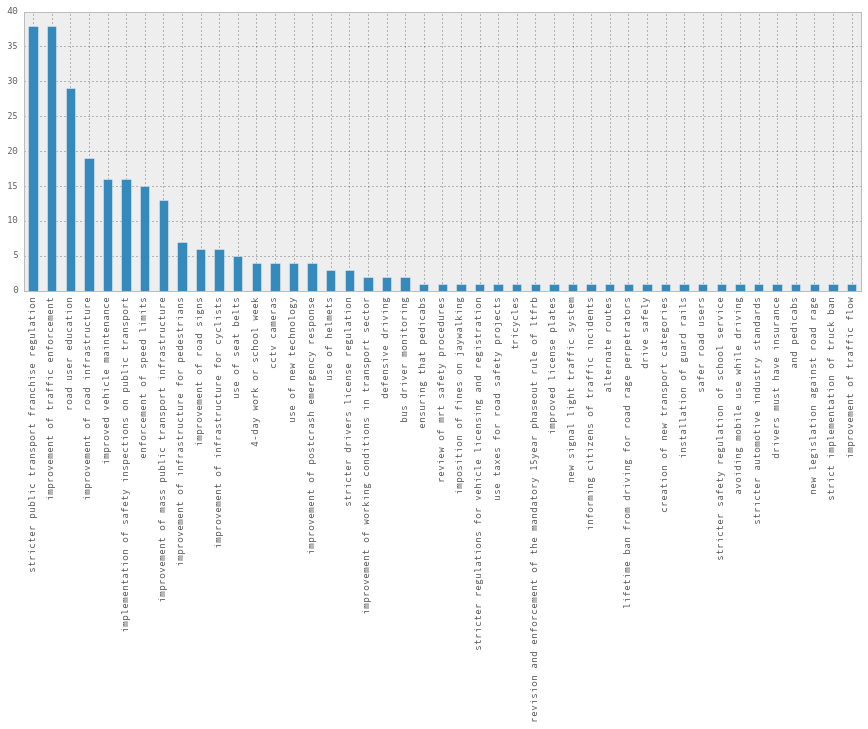

In [117]:
clean_solutions = pd.Series(clean_solutions(solutions_raw))
print clean_solutions.value_counts()
print clean_solutions.count()
clean_solutions.value_counts().plot(kind='bar')

In [118]:
from __builtin__ import any

def check_for_strings(test_string,substring_list):
#    for substring in substring_list:
#        if substring in test_string:
#            return True
#        elif:
    return any(substring in test_string for substring in substring_list)

management = ['enforce','regulat']
word = "enforcement"
other_word = "traffic management"
print check_for_strings(word,management)

True


In [119]:
def group_solutions(models):
    clean_list = []
    management = ['enforce','regulat','route','legislation','4-day','fines','traffic flow','license',
                 'truck ban','transport categories','procedures']
    users = ['education','helmet','drive','driving','seat belt','working conditions','citizens']
    roads = ['infrastructure','signs','rails','cctv','traffic light','road signs','signal light']
    vehicles = ['vehicle','automotive industry','safety inspection']
    for model in models:
        if check_for_strings(model,management):
            clean_list.append('improve road safety management')
        elif check_for_strings(model,users):
            clean_list.append('safer road users')
        elif check_for_strings(model,roads):
            clean_list.append('safer road infrastructure')
        elif check_for_strings(model,vehicles):
            clean_list.append('safer vehicles')
        else:
            clean_list.append(model)
    return clean_list            

improve road safety management                 109
safer road infrastructure                       57
safer road users                                49
safer vehicles                                  33
improvement of postcrash emergency response      4
dtype: int64


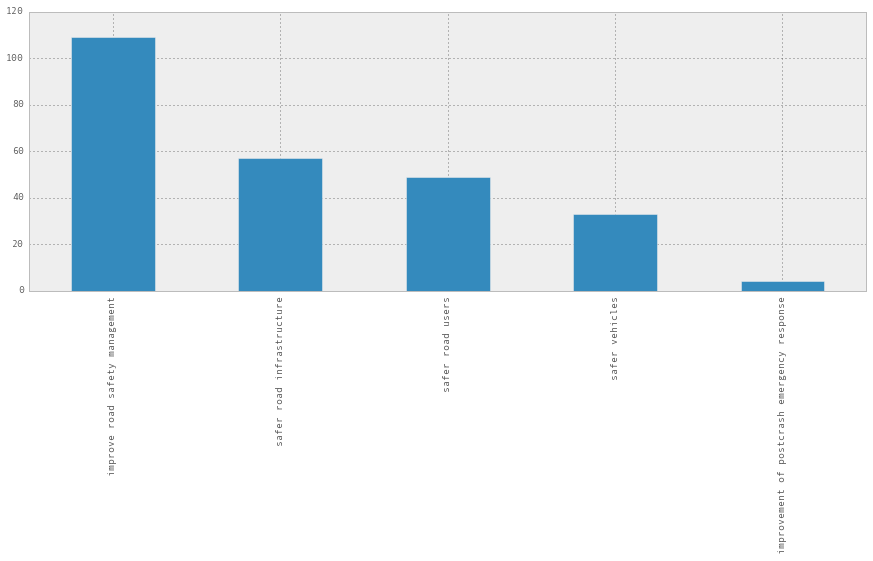

In [120]:
grouped_solutions = pd.Series(group_solutions(clean_solutions))
print grouped_solutions.value_counts()[:5]
grouped_solutions.value_counts()[:5].plot(kind='bar')

In [121]:
reports.cited_orgs = reports.cited_orgs.str.lower()
cited_orgs_raw = clean_list(reports.cited_orgs.dropna())
cited_orgs_raw = pd.Series([x.strip() for x in cited_orgs_raw])

In [122]:
def clean_orgs(models):
    clean_list = []
    for model in models:
        if "police" in model:
            clean_list.append("philippine national police")
        elif "city" in model:
            clean_list.append("local government unit")
        elif "lgu" in model:
            clean_list.append("local government unit")
        elif "mayor" in model:
            clean_list.append("local government unit")
        elif "barangay" in model:
            clean_list.append("local government unit")
        elif "local officials" in model:
            clean_list.append("local government unit")
        elif "presiden" in model:
            clean_list.append("office of the president")
        elif "malaca" in model:
            clean_list.append("office of the president")
        elif "mmda" in model:
            clean_list.append("metropolitan manila development authority")
        elif "dpwh" in model:
            clean_list.append("department of public works and highways")
        elif "franchising" in model:
            clean_list.append("ltfrb")
        elif "operator" in model:
            clean_list.append("transport groups")
        elif "concerned transport" in model:
            clean_list.append("transport groups")
        elif "automobile association" in model:
            clean_list.append("transport groups")
        elif "taxi" in model:
            clean_list.append("transport groups")
        elif "gv florida" in model:
            clean_list.append("transport groups")
        elif "pnp" in model:
            clean_list.append("philippine national police")
        elif "representative" in model:
            clean_list.append("senate or congress")
        elif "senat" in model:
            clean_list.append("senate or congress")
        elif "congress" in model:
            clean_list.append("congress")
        elif "skyway" in model:
            clean_list.append("highway operators")
        elif "highway" in model:
            clean_list.append("philippine national police")
        elif "malabon" in model:
            clean_list.append("local government unit")
        elif "marikina" in model:
            clean_list.append("local government unit")
        elif "toll" in model:
            clean_list.append("highway operators")
        elif "nlex" in model:
            clean_list.append("highway operators")
        elif "court" in model:
            clean_list.append("courts")
        elif "safe kids" in model:
            clean_list.append('nongovernment organizations')
        elif "dotc" in model:
            clean_list.append("department of transportation and communication")
        elif "movement" in model:
            clean_list.append("nongovernment organizations")
        else:
            clean_list.append(model)
    return clean_list

In [123]:
clean_cited_orgs = pd.Series(clean_orgs(cited_orgs_raw))
clean_cited_orgs.value_counts()[:10]

philippine national police                        168
metropolitan manila development authority         162
ltfrb                                              99
local government unit                              44
lto                                                42
department of transportation and communication     29
transport groups                                   28
office of the president                            24
highway operators                                  23
nongovernment organizations                        19
dtype: int64

In [124]:
def clean_report_type(models):
    clean_list = []
    for model in models:
        if "feature" in model:
            clean_list.append("feature")
        elif model == "-":
            None
        elif "in-depth" in model:
            clean_list.append("feature")
        else:
            clean_list.append(model)
    return clean_list   

straight news              823
commentary or editorial     33
feature                     22
dtype: int64


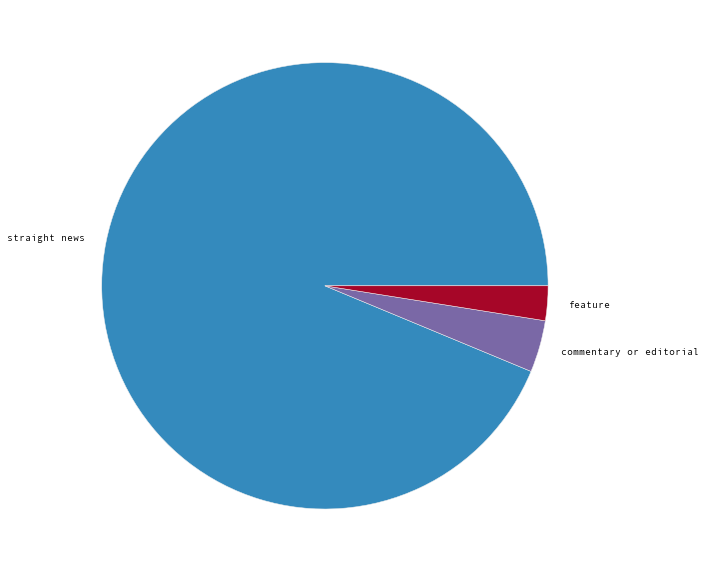

In [125]:
reports.report_type = reports.report_type.str.lower()
report_types = pd.Series(clean_report_type(reports.report_type.dropna()))
print report_types.value_counts()
report_types.value_counts().plot(kind='pie',figsize=(10,10))

#Use of terms

In [126]:
print reports.title.str.contains("accident").sum() + reports.title.str.contains("aksidente").sum()
#print reports.article.str.contains("accident").sum()

245


In [127]:
print reports.title.str.contains("crash").sum()

44


In [128]:
print reports.title.str.contains("mishap").sum()

27


In [129]:
print reports.title.str.contains("collision").sum()

27


In [130]:
print reports.title.str.contains("banggaan").sum()

2


In [131]:
print reports.title.str.contains("salpukan").sum()

3


###Helmet and Seatbelt Mentions amog solutions

In [132]:
print
solutions_raw.str.contains('helmet').sum() + solutions_raw.str.contains('seat belt').sum() + solutions_raw.str.contains('seatbelt').sum()

8

#Incident Analysis

All the analysis above has been on a per article basis. The next bit of code breaks out articles into incidents. Logic:

1. event hashtag = get list of unique hashtags, each one will represent one event
2. ID numbers of associated articles = get PK numbers of articles about each event
3. number of vehicles = for all associated articles with non-null vehicle number values, get the average
4. number of killed = for all associated articles with non-null killed numbers, list unique values
5. number of injured = for all associated articles with non-null injured numbers, list unique values
6. types of vehicles = list of all unique vehicle types from associated articles
7. event location = most frequent unique location from associated articles
8. event date = earliest publication date of associated article (edited)


###Code below creates a list of dictionaries in which each dict = 1 event. Key identifier is the event hashtag.

In [133]:
specific_events = reports[reports.specific_incident == "yes"]
specific_events = pd.DataFrame(specific_events)
specific_events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2014-01-02 00:00:00 to 2014-11-30 00:00:00
Data columns (total 49 columns):
Legal action            5 non-null object
accident_count          201 non-null object
agencies                107 non-null object
article                 372 non-null object
author                  275 non-null object
byline                  240 non-null object
cited_orgs              279 non-null object
completed               497 non-null object
date                    497 non-null datetime64[ns]
dominant_topics         497 non-null object
footage                 11 non-null object
how_many_vehicles       324 non-null float64
injured_number          221 non-null float64
injured_specific        203 non-null object
kicker                  5 non-null object
killed_number           161 non-null float64
killed_specific         140 non-null object
language                497 non-null object
larger_context          288 non-null object
link            

In [134]:
hashtags = list(specific_events.ongoing_coverage.dropna().unique())

#remove the "nan" item in the list

#hashtags = hashtags[]

def remove_double_hashtags(unique_hashtags):
    clean_list = []
    for item in unique_hashtags:
        if item.count("#") == 1:
            clean_list.append(item)
    return clean_list

hashtags = remove_double_hashtags(hashtags)
print hashtags
print len(hashtags)


['#SRPtunnelcrash', '#donmarianoskyway', '#hitandrunQC', '#bontocbustragedy', '#abracrash', '#cebuPWDcrash', '#8vehiclecollissionQC', '#SUVskywaycrash', '#mayamybuscommonwealth', '#elenalinerbuscrash', '#4deadcavite', '#matalamcrash', '#40hurtonSLEX', '#southerncarrier', '#truckbuscollisionEDSA', '#bryangahol', '#corimbabus', '#pnoyconvoy', '#uproadrage', '#2deadonC5', '#trainjeepcrashManila', '#maserati', '#1killedTaytay', '#3deadincagayan', '#pnrtondocrash', '#20vehiclemarcoshighway', '#8vehiclesC5', '#TVexeccrash', '#16hurtQuezon', '#3buscollisionEDSA', '#16hurtinSablan', '#buguiascrash', '#lagunacop', '#victorylinerNLEX', '#apalitcrash', '#truckfallsTaguig', '#47hurtBatangas', '#xavierschoolbus', '#asistiocrash', '#acostaMMDA', '#1deadsorsogon', '#truckSLEX', '#7hurtinparanaque', '#cavitecouple', '#skywaycoaster', '#sccibus', '#2killedinbenguet', '#9deadincarcar', '#libmanan', '#victoryolongapo', '#jambusbatangas', '#lagunacrash', '#pablomartinez', '#fieldtripcrash', '#13deadbengue

In [135]:
def get_events(hashtag_list):
    all_events = []
    for hashtag in hashtag_list:
        event = {'event_hashtag': hashtag}
        all_events.append(event)
    return all_events

all_events = get_events(hashtags)

#print all_events


###Assembling articles that reference each event:

In [136]:
#this function will get all the PK number of articles associated with a hashtag

def get_associated_articles_one_event(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    associated_article_numbers = list(event_coverage.pk)
    return associated_article_numbers

print get_associated_articles_one_event("#bontocbustragedy")

#this function delivers the number of articles containing a hashtag

def coverage_frequency(hashtag):
    article_numbers = get_associated_articles_one_event(hashtag)
    return len(article_numbers)

print coverage_frequency("#bontocbustragedy")


[1050.0, 2526.0, 711.0, 264.0, 614.0, 102.0, 185.0, 1385.0, 77.0, 1414.0, 363.0, 600.0, 200.0, 1906.0, 369.0, 1897.0, 394.0, 1725.0, 320.0, 1871.0, 107.0, 141.0, 727.0, 2331.0, 2105.0, 2442.0, 2404.0, 2246.0, 452.0, 1778.0, 2619.0, 1028.0, 715.0, 809.0, 2637.0, 2638.0, 2639.0, 2640.0, 2641.0, 2642.0, 2643.0, 2644.0, 2645.0, 2646.0, 2647.0, 2649.0, 2650.0, 2651.0, 2652.0, 2653.0, 2654.0, 2655.0, 2656.0, 2658.0, 2659.0, 2660.0, 2661.0, 2663.0, 2664.0, 2667.0, 2735.0]
61


###Getting number of vehicles involved in event

In [137]:
#this function will get the number of vehicles involved in the accident by averaging non-null vehicle_number values

def get_vehicle_numbers_one_event(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    vehicle_numbers = event_coverage.how_many_vehicles.dropna()
    vehicle_numbers = vehicle_numbers.unique()
    if len(vehicle_numbers) != 0:
        return max(vehicle_numbers)
    else:
        return None

print get_vehicle_numbers_one_event("#bontocbustragedy")


1.0


###Getting number of victims

In [138]:
def get_fatalities(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    fatalities = event_coverage.killed_number.dropna()
    fatalities = fatalities.unique()
    if len(fatalities) != 0:
        return max(fatalities)
    else:
        return None

print get_fatalities("#bontocbustragedy")


15.0


In [139]:
def get_injured(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    injured = event_coverage.injured_number.dropna()
    injured = injured.unique()
    if len(injured) != 0:
        return max(injured)
    else:
        return None

print get_injured("#bontocbustragedy")


32.0


###Getting all unique vehicle types involved in event

In [140]:
#this function will deliver all associated vehicle types. logic: just get all the unique types

def get_vehicle_types_one_event(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    vehicle_types = event_coverage.vehicle_type.dropna()
    if len(vehicle_types.unique()) != 0:
        return vehicle_types.unique()
    else:
        return None

print get_vehicle_types_one_event("#mrtcrash")


None


###Getting incident date (approximate based on date of earliest article)

In [141]:
# get date of incident - approximately the date of the first article published

def get_incident_date(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    incident_date = list(event_coverage.index)
    return min(incident_date)

print get_incident_date("#bontocbustragedy")

2014-02-07 00:00:00


###Getting incident time (precise versus general)

In [142]:
# get time of incident - find earliest time

def get_time(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    incident_times = event_coverage.time_od_day.dropna()
    incident_times_various = []
    if len(incident_times) == 1:
        return incident_times[0]
    elif len(incident_times) > 1:
        for time in incident_times:
            incident_times_various.append(time)
        return set(incident_times_various)
    
print get_time("#bontocbustragedy")


set(['7:00 AM', 'Morning'])


###Identify possible event locations. This needs to be manually reviewed later.

In [143]:
# this function will find the event location. logic: get list of unique locations and later manually set them

def get_location_one_event(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    locations = event_coverage.location.dropna()
    if len(locations) != 0:
        return locations.unique()
    else:
        return None

print get_location_one_event("#bontocbustragedy")


['Mt Province, Bontoc' 'Benguet, Bontoc, Barangay Bayyo'
 'Mountain Province, Bontoc' 'Mt Province, Benguet' 'Tuguegarao City']


###Getting victim description info

In [144]:
def get_injured_specific(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    injured_desc = event_coverage.injured_specific.dropna()
    if len(injured_desc) == 1:
        return injured_desc[0]
    elif len(injured_desc) > 1:
        injured_desc_combined = []
        for x in injured_desc:
            injured_desc_combined.append(x)
        return set(injured_desc_combined)
                            
print get_injured_specific('#donmarianoskyway')
    

ridergroup: passenger * 24/


In [145]:
def get_killed_specific(hashtag):
    event_coverage = specific_events[specific_events.ongoing_coverage == hashtag]
    has_killed_desc = event_coverage.killed_specific.dropna()
    if len(has_killed_desc) == 1:
        return has_killed_desc[0]
    elif len(has_killed_desc) > 1:
        killed_desc_combined = []
        for x in has_killed_desc:
            killed_desc_combined.append(x)
        return set(killed_desc_combined)
              
print get_killed_specific('#donmarianoskyway')
    

ridergroup: driver; /
ridergroup: passenger; * 23/


###Assembling all key event data (except victims)

In [146]:
#this function applies all above functions to all events to assemble unique event info

def get_all_event_data(all_events):
    for event in all_events:
        hashtag = event["event_hashtag"]
        event["associated_articles"] = get_associated_articles_one_event(hashtag)
        event["coverage_frequency"] = coverage_frequency(hashtag)
        event["location"] = get_location_one_event(hashtag)
        event["number_of_vehicles"] = get_vehicle_numbers_one_event(hashtag)
        event["vehicle_types"] = get_vehicle_types_one_event(hashtag)
        event["incident_date"] = get_incident_date(hashtag)
        event["killed_number"] = get_fatalities(hashtag)
        event['killed_specific'] = get_killed_specific(hashtag)
        event["injured_number"] = get_injured(hashtag)
        event['injured_specific'] = get_injured_specific(hashtag)
        event['time'] = get_time(hashtag)
        #if get_time(hashtag) is not None:
        #    event.update(get_time(hashtag))
    return all_events

all_events = get_all_event_data(all_events)


In [147]:
covered_once = specific_events[specific_events.ongoing_coverage.isnull()]
covered_once.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2014-01-02 00:00:00 to 2014-11-26 00:00:00
Data columns (total 49 columns):
Legal action            1 non-null object
accident_count          145 non-null object
agencies                42 non-null object
article                 196 non-null object
author                  159 non-null object
byline                  119 non-null object
cited_orgs              132 non-null object
completed               241 non-null object
date                    241 non-null datetime64[ns]
dominant_topics         241 non-null object
footage                 7 non-null object
how_many_vehicles       227 non-null float64
injured_number          154 non-null float64
injured_specific        141 non-null object
kicker                  1 non-null object
killed_number           103 non-null float64
killed_specific         93 non-null object
language                241 non-null object
larger_context          182 non-null object
link               

In [148]:
covered_once = covered_once[['title','date','pk','location','time_od_day','how_many_vehicles','vehicle_type','killed_number','killed_specific','injured_number','injured_specific']]
covered_once.set_index('date')
covered_once.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2014-01-02 00:00:00 to 2014-11-26 00:00:00
Data columns (total 11 columns):
title                241 non-null object
date                 241 non-null datetime64[ns]
pk                   241 non-null float64
location             231 non-null object
time_od_day          154 non-null object
how_many_vehicles    227 non-null float64
vehicle_type         229 non-null object
killed_number        103 non-null float64
killed_specific      93 non-null object
injured_number       154 non-null float64
injured_specific     141 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 22.6+ KB


In [149]:
covered_once.columns = ['event_hashtag','incident_date','associated_articles','location','time','number_of_vehicles','vehicle_types',
                        'killed_number','killed_specific','injured_number','injured_specific']
covered_once.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2014-01-02 00:00:00 to 2014-11-26 00:00:00
Data columns (total 11 columns):
event_hashtag          241 non-null object
incident_date          241 non-null datetime64[ns]
associated_articles    241 non-null float64
location               231 non-null object
time                   154 non-null object
number_of_vehicles     227 non-null float64
vehicle_types          229 non-null object
killed_number          103 non-null float64
killed_specific        93 non-null object
injured_number         154 non-null float64
injured_specific       141 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 22.6+ KB


###Converts events list of dicts to dataframe

In [150]:
covered_multiple = pd.DataFrame.from_records(all_events)
covered_multiple.set_index('incident_date')
print covered_multiple.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 12 columns):
associated_articles    58 non-null object
coverage_frequency     58 non-null int64
event_hashtag          58 non-null object
incident_date          58 non-null datetime64[ns]
injured_number         39 non-null float64
injured_specific       36 non-null object
killed_number          30 non-null float64
killed_specific        26 non-null object
location               45 non-null object
number_of_vehicles     49 non-null float64
time                   36 non-null object
vehicle_types          49 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 5.9+ KB
None


In [151]:
frames = [covered_once,covered_multiple]
events = pd.concat(frames)
events['incident_date'] = pd.to_datetime(events['incident_date'])
events = events.set_index('event_hashtag')
events.info()


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, Bus hits delivery truck on SLEx, 2 hurt | Inquirer News to #dumptruckguagua
Data columns (total 11 columns):
associated_articles    299 non-null object
coverage_frequency     58 non-null float64
incident_date          299 non-null datetime64[ns]
injured_number         193 non-null float64
injured_specific       177 non-null object
killed_number          133 non-null float64
killed_specific        119 non-null object
location               276 non-null object
number_of_vehicles     276 non-null float64
time                   190 non-null object
vehicle_types          278 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 28.0+ KB


In [152]:
events['coverage_frequency'].fillna(1,inplace="True")
events.info()


<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, Bus hits delivery truck on SLEx, 2 hurt | Inquirer News to #dumptruckguagua
Data columns (total 11 columns):
associated_articles    299 non-null object
coverage_frequency     299 non-null float64
incident_date          299 non-null datetime64[ns]
injured_number         193 non-null float64
injured_specific       177 non-null object
killed_number          133 non-null float64
killed_specific        119 non-null object
location               276 non-null object
number_of_vehicles     276 non-null float64
time                   190 non-null object
vehicle_types          278 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 28.0+ KB


###Exports to CSV File

In [153]:
events.to_csv("events_raw.csv",index_label="event_hashtag")

In [154]:
reports['title'][:10]


2014-01-02    Bus hits delivery truck on SLEx, 2 hurt | Inqu...
2014-01-02    Bus accident disrupts Commonwealth Ave. traffi...
2014-01-02    Pinoys returning to NCR from holiday break; nu...
2014-01-03    Sobrang liwanag na headlight sa mga sasakyan, ...
2014-01-03    Legislator seeks abolition of Road Board | Inq...
2014-01-04    SUV driver, 2 passengers injured; contractors ...
2014-01-04                 Motorcycle rider dies in EDSA mishap
2014-01-06    2 killed in Pangasinan road accident | Inquire...
2014-01-04    QC sets clampdown on bogus vehicle emission te...
2014-01-05    Truck driver spared; drivers agree on deal   |...
Name: title, dtype: object